In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [83]:
img = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

In [84]:
_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

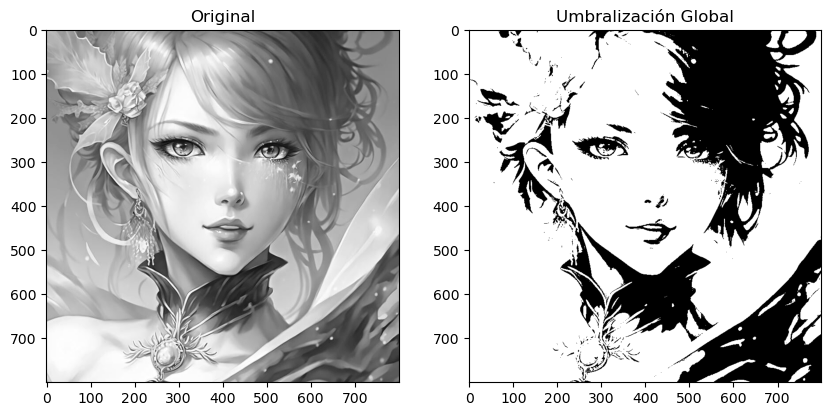

In [85]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(global_thresh, cmap='gray'), plt.title('Umbralización Global')
plt.show()

In [86]:
image =  cv2.imread('banshee07.jpg',cv2.IMREAD_GRAYSCALE)

In [87]:
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

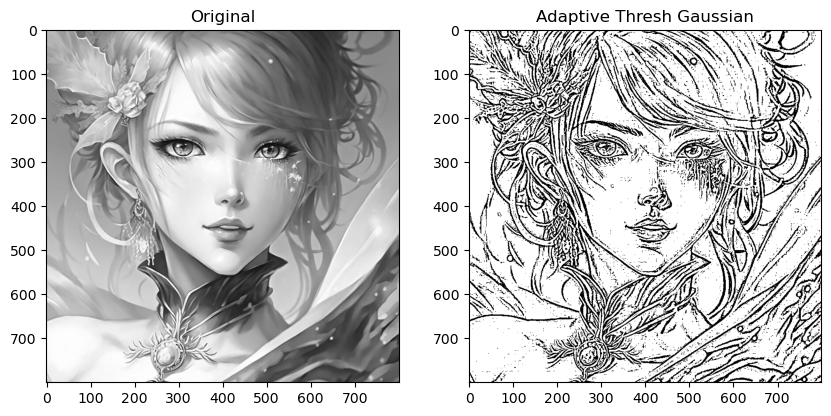

In [88]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(adaptive_thresh,cmap='gray'), plt.title('Adaptive Thresh Gaussian')
plt.show()


In [89]:
from skimage import data, color
from skimage.segmentation import random_walker
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [90]:
imagen = color.rgb2gray(io.imread('banshee07.jpg'))

In [91]:
markers= np.zeros(image.shape,dtype=np.uint)
markers[imagen < 0.6] = 1
markers[imagen > 0.7] = 2

labels = random_walker(imagen, markers, beta = 10, mode ='bf')

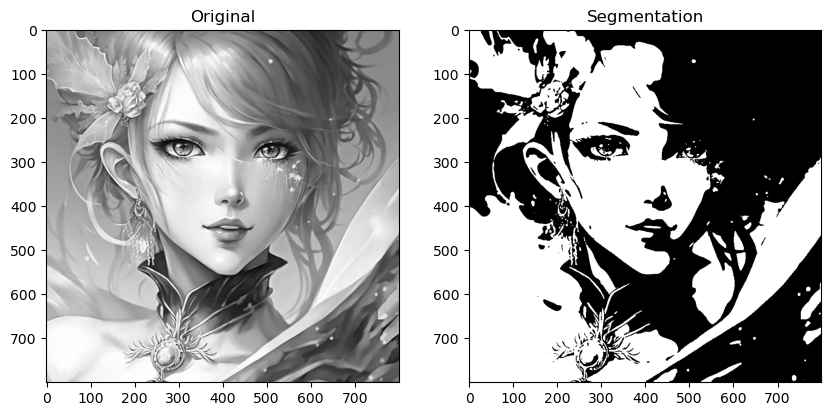

In [92]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(imagen, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(labels, cmap='gray'), plt.title('Segmentation')
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

In [94]:
image = io.imread('banshee07.jpg')
gray_image = color.rgb2gray(image)

In [95]:
smooth_image = filters.gaussian(gray_image, sigma=1.0)

In [96]:
edges = feature.canny(smooth_image,sigma=1.0)

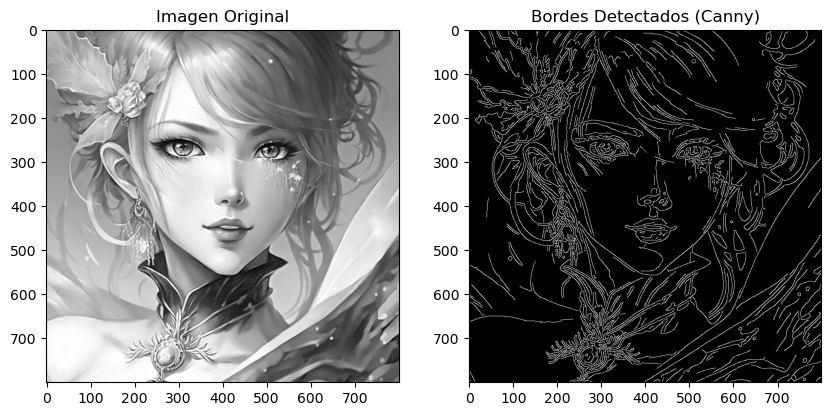

In [97]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados (Canny)')

plt.show()

In [98]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [99]:
image = io.imread('banshee07.jpg')
image_gray = color.rgb2gray(image)

In [100]:
image_flat = np.reshape(image_gray, (-1, 1))

num_clusters = 5

In [101]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(image_flat)
labels = kmeans.labels_

C:\Users\jumunoz\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [102]:
segmented_image = np.reshape(labels, image_gray.shape)

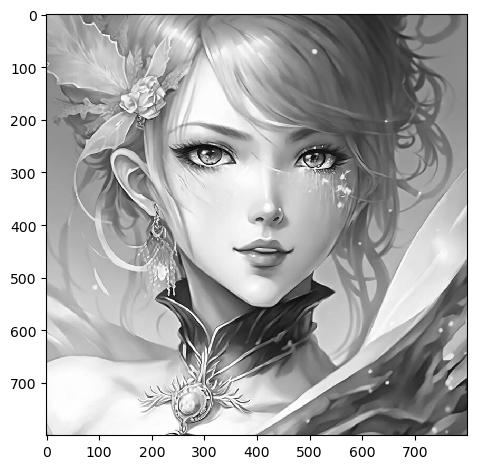

In [103]:
io.imshow(image_gray, cmap='gray')
io.show()

C:\Users\jumunoz\AppData\Local\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


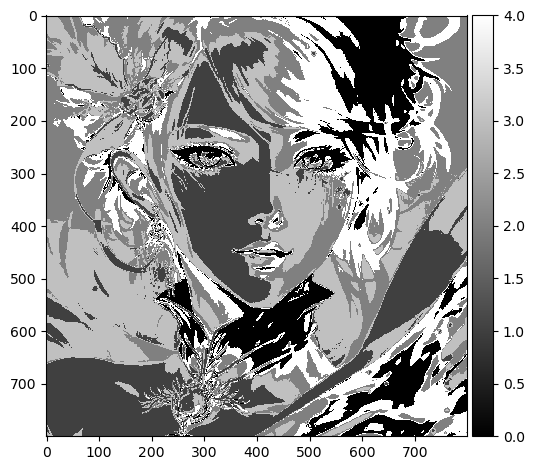

In [104]:
io.imshow(segmented_image, cmap='gray')
io.show()

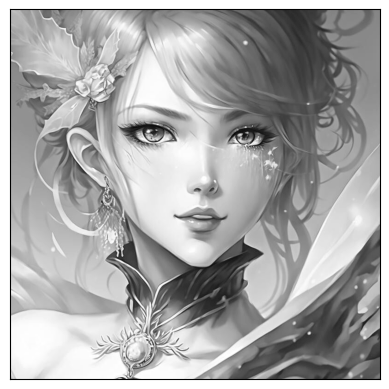

In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('banshee07.jpg',0) # Using 0 to read image in grayscale mode
plt.imshow(img, cmap='gray')  #cmap is used to specify imshow that the image is in greyscale
plt.xticks([]), plt.yticks([])  # remove tick marks
plt.show()

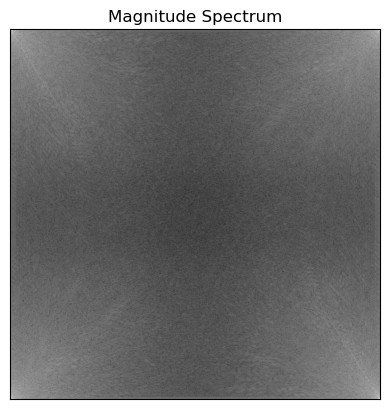

In [128]:
f = np.fft.fft2(img)  #the image 'img' is passed to np.fft.fft2() to compute its 2D Discrete Fourier transform f 
mag = 20*np.log(np.abs(f))
plt.imshow(mag, cmap = 'gray') #cmap='gray' parameter to indicate that the image should be displayed in grayscale.
plt.title('Magnitude Spectrum') 
plt.xticks([]), plt.yticks([])
plt.show()

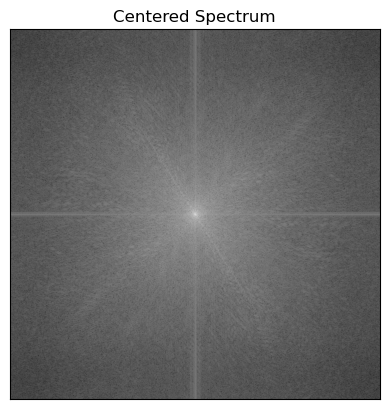

In [107]:
fshift = np.fft.fftshift(f)
mag = 20*np.log(np.abs(fshift)) 
plt.imshow(mag, cmap = 'gray')
plt.title('Centered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [108]:
import math
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

In [109]:
import math
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

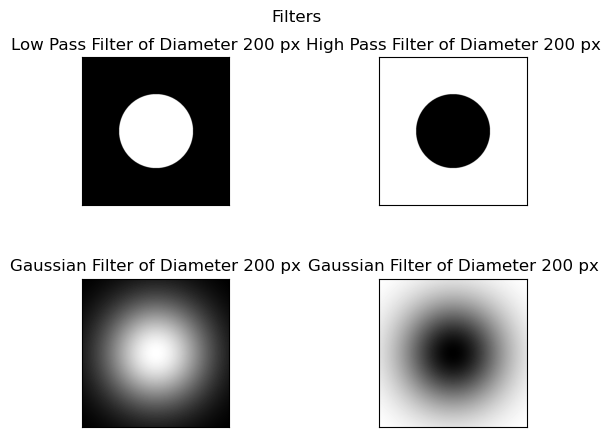

In [132]:
fig, ax = plt.subplots(2, 2) # create a 2x2 grid of subplots
fig.suptitle('Filters') # set the title for the entire figure

# plot the first image in the top-left subplot
im1 = ax[0, 0].imshow(np.abs(idealFilterLP(200, img.shape)), cmap='gray')
ax[0, 0].set_title('Low Pass Filter of Diameter 200 px')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

# plot the second image in the top-right subplot
im2 = ax[0, 1].imshow(np.abs(idealFilterHP(200, img.shape)), cmap='gray')
ax[0, 1].set_title('High Pass Filter of Diameter 200 px')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

# plot the third image in the bottom-left subplot
im3 = ax[1, 0].imshow(np.abs(gaussianLP(200 ,img.shape)), cmap='gray')
ax[1, 0].set_title('Gaussian Filter of Diameter 200 px')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

# plot the fourth image in the bottom-right subplot
im4 = ax[1, 1].imshow(np.abs(gaussianHP(200 ,img.shape)), cmap='gray')
ax[1, 1].set_title('Gaussian Filter of Diameter 200 px')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

# adjust the spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# save the figure to a file
fig.savefig('filters.png', bbox_inches='tight')

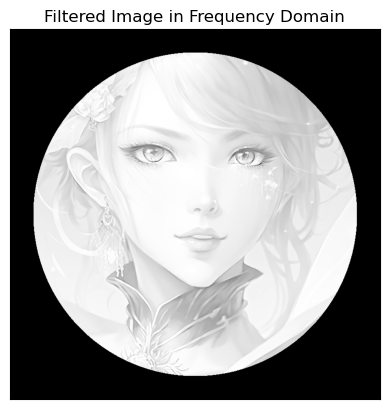

In [156]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(1+np.abs(img * idealFilterLP(350,img.shape))), cmap='gray')
ax.set_title('Filtered Image in Frequency Domain')
ax.set_xticks([])
ax.set_yticks([])

fig.savefig('filtered image in freq domain.png', bbox_inches='tight')

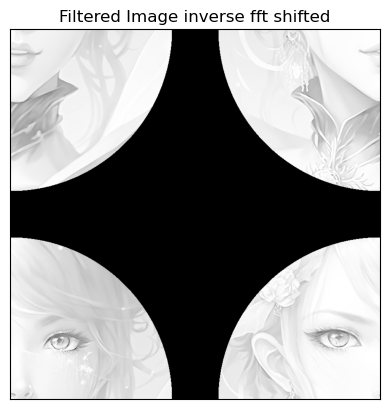

In [157]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(1+np.abs(np.fft.ifftshift(img * idealFilterLP(350,img.shape)))), cmap='gray')
ax.set_title('Filtered Image inverse fft shifted')
ax.set_xticks([])
ax.set_yticks([])

fig.savefig('filtered image inverse fft shifted.png', bbox_inches='tight')

In [134]:
print("Shape of kernel:", kernel.shape)
print("Shape of input data:", data.shape)

Shape of kernel: (5, 5)
Shape of input data: (800, 800)


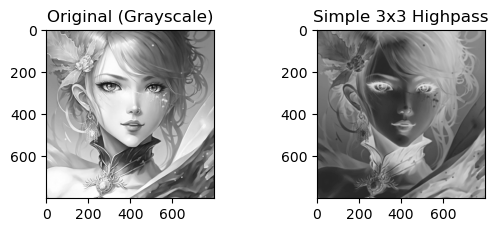

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image  # Corrected import

def plot(data, title):
    plot.i += 1
    plt.subplot(2, 2, plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open('banshee07.jpg')
# Convert the image to grayscale
im_gray = im.convert('L')
data = np.array(im_gray, dtype=float)
plot(data, 'Original (Grayscale)')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  4, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')



Shape of kernel: (5, 5)


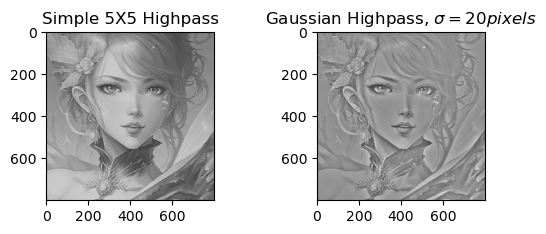

In [167]:
# A slightly "wider", but still very simple highpass filter
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  4,  8,  4, -1],
                   [-1,  2,  4,  2, -1],
                   [-1, -1, -1, -1, -1]])
print("Shape of kernel:", kernel.shape)
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5X5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 20)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 20 pixels$')

plt.show()